# Position of a Quasar

You measure the position of a quasar $N$ times with the *same* telescope i.e. errors are homoscedastic. Let's say the underlying process is Gaussian, the true position is $\mu = 1$ (in suitable units), and the erorrs are $\sigma=0.2$

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

## Part 1 
- Generate fake measurements

In [2]:
N = 5
mu = 1
sigma = 0.2

np.random.seed(42)
my_sample = norm(mu, sigma).rvs(N)

In [3]:
my_sample

array([1.09934283, 0.97234714, 1.12953771, 1.30460597, 0.95316933])

- Plot each of the individual likelihoods separately.  Also plot their product (i.e. the likelihood of the dataset $\{x_i\}$). Make sure the x grid has enough points.


In [4]:
x_i = np.linspace(0, 2, 1000)

Ls = np.array([norm.pdf(x_i, loc=s, scale=sigma) for s in my_sample])
L = np.prod(Ls, axis=0)

np.max(L)

11.580002432834881

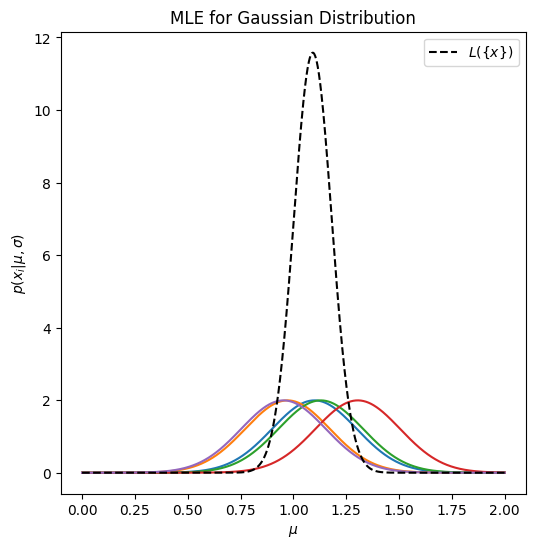

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))

for likelihood in Ls:
    plt.plot(x_i, likelihood, ls='-')
    
plt.plot(x_i, L, linestyle='--', c='black', label=r'$L(\{x\})$')

plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.title('MLE for Gaussian Distribution')
plt.legend()

- Just read off the maximum likelihood solution (e.g. using `np.argsort`) 

In [6]:
max_index = np.argmax(L)
print(r'L is maximixed for $\mu =$ ', x_i[max_index])

L is maximixed for $\mu =$  1.0910910910910911


- Compare it with the MLE estimator derived above

In [7]:
ML_estimator = np.mean(my_sample)
print('MLE =', ML_estimator)

MLE = 1.0918005948650173


In [9]:
logL = np.log(L)

max_logL_index = np.argmax(logL)
print(fr'Log(L) is maximixed for $\mu$ = {x_i[max_logL_index]}')

Log(L) is maximixed for $\mu$ = 1.0910910910910911


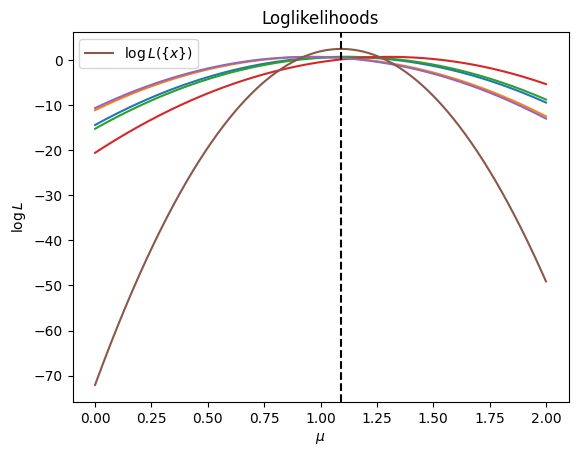

In [11]:
for i in range(N):
    plt.plot(x_i, np.log(Ls[i]))

plt.plot(x_i, np.log(L), label=r'$\log L(\{x\})$' )
plt.axvline(x = x_i[max_logL_index], color='black', linestyle='--')
plt.xlabel(fr'$\mu$')
plt.ylabel(fr'$\log L$')
plt.title('Loglikelihoods')
plt.legend()

## Part 2

Check the Fisher matrix error estimate makes sense

$$
    \sigma_\mu = \left[ - \frac{d^2 \ln L(\mu)}{d \mu^2}  \Bigg|_{\hat{\mu}}\right]^{-1/2}
$$
- do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function with `np.diff`, 

In [14]:
diff = np.diff(logL, n=2)

- divide through by our $\Delta \theta^2$ to get the correct normalization, 

In [15]:
second_derivative = diff / (x_i[1] - x_i[0])**2

- multiply by $-1$, 

In [16]:
second_derivative *= -1

- then take the square root.

In [17]:
sigma_mu = 1 / np.sqrt(second_derivative[max_index])

In [18]:
print('Fisher matrix error on estimated mean is %.3f' % sigma_mu)

Fisher matrix error on estimated mean is 0.089


- Compare with the Fisher matrix error derived above

$$
    \sigma_\mu = \frac{\sigma}{\sqrt{N}}
$$

In [19]:
MLE_sigma = sigma / N**(0.5)
print('Fisher Matrix error is %.3f' % MLE_sigma)

Fisher Matrix error is 0.089


- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees) 

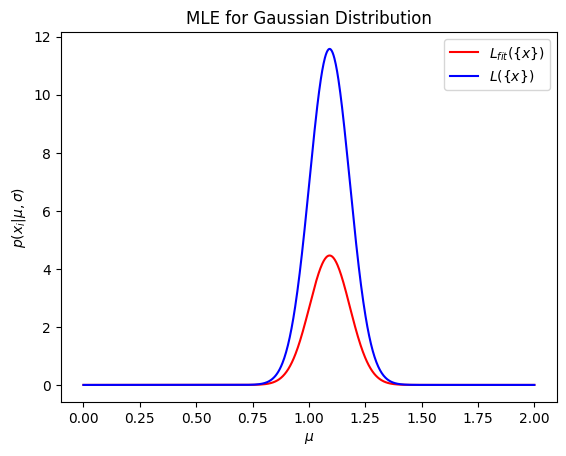

In [25]:
L_fit = norm.pdf(x_i, loc=ML_estimator, scale=MLE_sigma)

plt.plot(x_i, L_fit, color='red', label=r'$L_{fit}(\{x \})$')
plt.plot(x_i, L, color='blue', label=r'$L(\{x \})$')
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution')
plt.legend()

## Part 3

Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distribured with mean $0.2$ and standard deviation $0.05$

- Generalize your code from above to this case

In [31]:
N = 5
mu = 1

sigma_hetero = norm(0.2, 0.05).rvs(N)

np.random.seed(42)
my_sample_hetero = norm(mu, sigma_hetero).rvs(N)

In [32]:
my_sample_hetero

array([1.09352787, 0.9614297 , 1.15439064, 1.2688548 , 0.94681721])

In [33]:
sigma_hetero

array([0.18829315, 0.27896064, 0.23837174, 0.17652628, 0.227128  ])

In [44]:
Ls_hetero = []
for i in range(N):
    Ls_hetero.append(norm.pdf(x_i, loc=my_sample_hetero[i], scale=sigma_hetero[i]))

Ls_hetero = np.array(Ls_hetero)
L_hetero = np.prod(Ls_hetero, axis=0)

np.max(L_hetero)

8.817530366800211

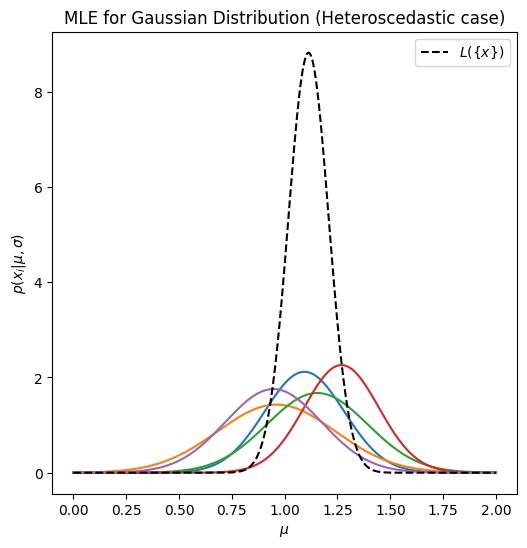

In [45]:
fig, ax = plt.subplots(figsize=(6, 6))

for likelihood in Ls_hetero:
    plt.plot(x_i, likelihood, ls='-')
    
plt.plot(x_i, L_hetero, linestyle='--', c='black', label=r'$L(\{x\})$')

plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.title('MLE for Gaussian Distribution (Heteroscedastic case)')
plt.legend()

In [50]:
max_index_hetero = np.argmax(L_hetero)
print('L is maximixed at %.3f' % x_i[max_index_hetero])

L is maximixed at 1.113


In [54]:
ML_estimator_hetero = np.average(my_sample_hetero, weights=1/sigma_hetero**2)
print('MLE = ', ML_estimator_hetero)

MLE =  1.1131053846960444


In [55]:
logL_hetero = np.log(L_hetero)

In [56]:
diff_hetero = np.diff(logL_hetero, n=2)
sec_der_hetero = diff_hetero / (x_i[1] - x_i[0])**2
sec_der_hetero *= (-1)
sigma_mu_hetero = 1 / np.sqrt(sec_der_hetero[max_index_hetero])

print('Fisher matrix error on estimated mean is %.3f' % sigma_mu_hetero)

Fisher matrix error on estimated mean is 0.095


In [58]:
MLE_sigma_hetero = np.sum(sigma_hetero**(-2))**(-0.5)
print('Fisher matrix error is ', MLE_sigma_hetero)

Fisher matrix error is  0.09528984929090246


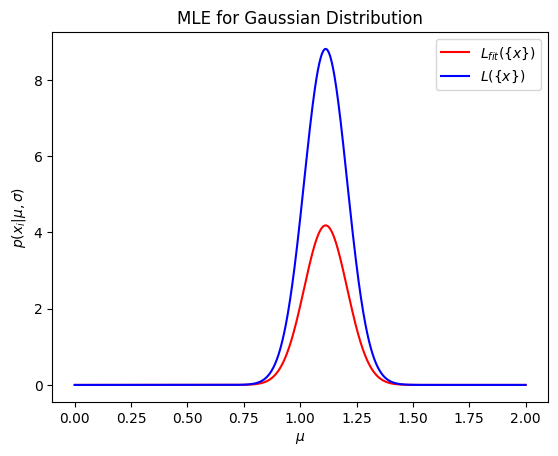

In [59]:
L_fit_hetero = norm.pdf(x_i, loc=ML_estimator_hetero, scale=MLE_sigma_hetero)

plt.plot(x_i, L_fit_hetero, color='red', label=r'$L_{fit}(\{x \})$')
plt.plot(x_i, L_hetero, color='blue', label=r'$L(\{x \})$')
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution')
plt.legend()